# Diagramma colorato stelle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
class Star:
    def __init__(self, Nbins, markersize):
        self.Nbins = Nbins
        self.markersize = markersize
        
    @property
    def read(self):
        #statements per lettura file
        df = pd.read_table('Nemo_6670.dat', sep=' ', comment='#', header=None)
        df.columns = ["MsuH", "m_ini", "logL", "logTe", "M_ass", "b_ass", "y_ass", "m_app", "b-y", "dist", "abs_dist", "ID_parent", "age_parent"]
        return df
    
    @property
    def cut(self):
        #statements per raggruppamento per range di età
        bins = pd.cut(self.read['age_parent'], bins=self.Nbins)
        return bins
    
    @property
    def colormap(self):
        #statements per creare la colormap
        cmap = plt.cm.get_cmap('viridis', self.Nbins)
        return cmap

    
    def plottare(self):
        #statements per plottare il grafico
        plt.figure(figsize=(10, 6))
        for i, (bin_value, group) in enumerate(self.read.groupby(self.cut)):
            color = self.colormap(i / (self.Nbins - 1)) #calcola i colori della colormap
            plt.scatter(group['b-y'], group['M_ass'], label=f'Bin; {bin_value.left:.2f} to {bin_value.right:.2f}', color=color, s=self.markersize, alpha=0.8)

        plt.ylim(9, -4)
        plt.xlabel('b-y')
        plt.ylabel('$M_V$')
        plt.title('Scatter plot of b-y vs $M_V$')
        plt.legend(loc='best', title='Age bins', fontsize='6')
        plt.show()


    

/var/folders/8p/p4zymz7n243864v_v09jd_480000gn/T/ipykernel_5492/2346327470.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (bin_value, group) in enumerate(self.read.groupby(self.cut)):
/var/folders/8p/p4zymz7n243864v_v09jd_480000gn/T/ipykernel_5492/2346327470.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', self.Nbins)


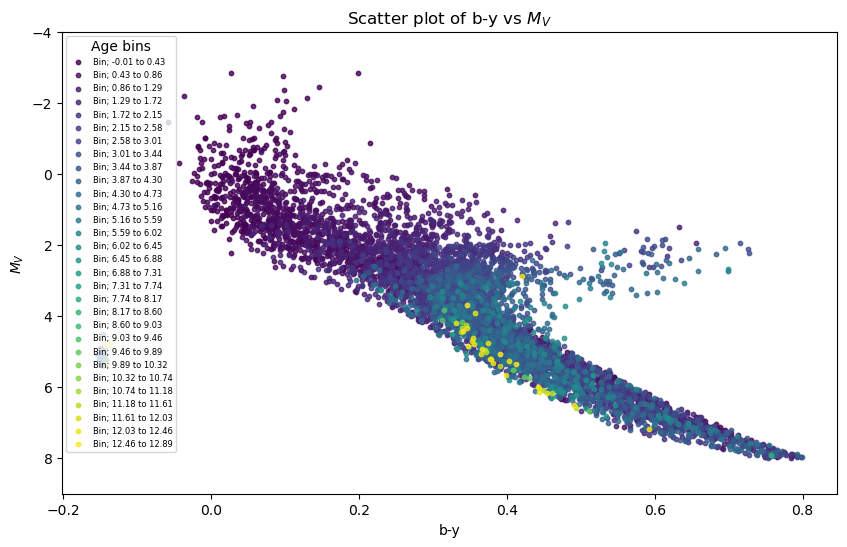

In [3]:
stella = Star(30,10)
stella.plottare()